# Calculations for SpiralArmsPotential.py

Jack Hong  
May 19, 2017

Based on the paper by Cox and Gomez (2002). https://arxiv.org/abs/astro-ph/0207635v1

Some notes:
 * $amp =4 \pi G \rho_0$ is handled by the super class Potential.
 * $g$ is $\gamma$ from the paper
 * $R$ here refers to $r$ from the paper
 * $r_{ref}$ is $r_0$ from the paper and $\phi_{ref}$ is $\phi_p(r_0)$

In [1]:
import sympy as sym

In [2]:
sym.init_printing(sym.latex)

In [3]:
R, phi, z, t, N, alpha, r_ref, phi_ref, R_s, H, omega, C_n, n = \
sym.symbols('R phi z t N alpha r_ref phi_ref R_s H omega C_n n')

In [4]:
g, K_n, B_n, D_n = sym.symbols('g, K_n, B_n, D_n', cls=sym.Function)

# For now, just note the arguments of the following functions. They will be specified later.
g = g(phi, R, t)
K_n = K_n(R)
B_n = B_n(R)
D_n = D_n(R)

## The Potential

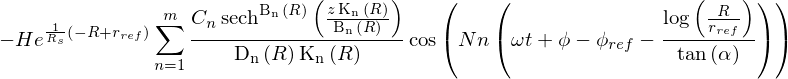

In [40]:
m = sym.var('m') # dummy variable for summation
Phi = -H*sym.exp(-(R-r_ref)/R_s)*sym.summation((C_n/(K_n*D_n))*(sym.cos(n*g))*(sym.sech(K_n*z/B_n))**B_n,
                                                (n, 1, m))
Phi

## Rforce ($-\frac{d\Phi}{dR}$)

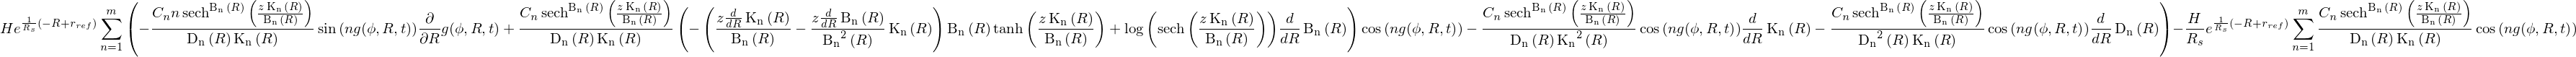

In [23]:
dPhi_dR = sym.diff(Phi, R)
-dPhi_dR

## zforce ($-\frac{d\Phi}{dz}$)

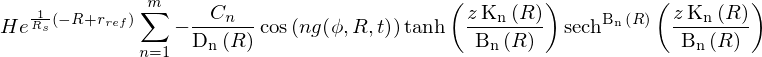

In [7]:
dPhi_dz = sym.diff(Phi, z)
-dPhi_dz

## phiforce ($-\frac{d\Phi}{d\phi}$)

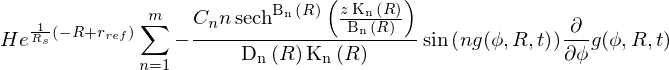

In [8]:
dPhi_dphi = sym.diff(Phi, phi)
-dPhi_dphi

## R2deriv ($\frac{d^2 \Phi}{dR^2}$)

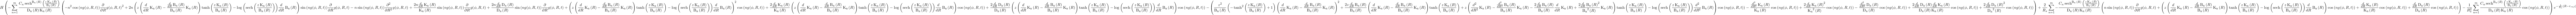

In [32]:
d2Phi_dR2 = sym.diff(Phi, R, 2)
d2Phi_dR2

## z2deriv ($\frac{d^2\Phi}{dz^2}$)

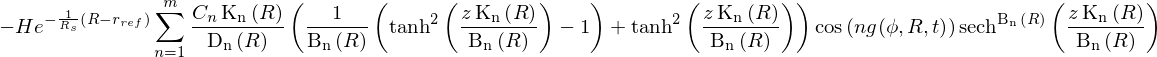

In [9]:
d2Phi_dz2 = sym.diff(Phi, z, 2)
d2Phi_dz2

## phi2deriv ($\frac{d^2 \Phi}{d \phi^2}$)

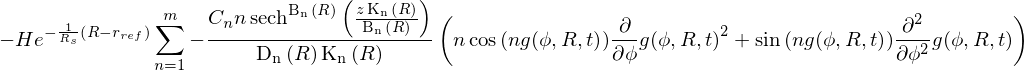

In [38]:
d2Phi_dphi2 = sym.diff(Phi, phi, 2)
d2Phi_dphi2

## $\frac{d(\gamma^2)}{d\phi}$

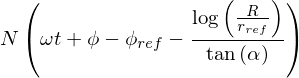

In [35]:
g = N * (phi - phi_ref - sym.log(R/r_ref)/sym.tan(alpha) + omega*t)
g

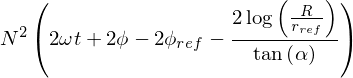

In [21]:
sym.diff(g**2, phi)

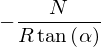

In [22]:
sym.diff(g, R)

## Define $K_n$, $B_n$, and $D_n$

In [27]:
K = n*N/R/sym.sin(alpha)
B = K*H*(1.+0.4*K*H)
D = (1.+ K*H + 0.3*(K*H)**2)/(.1+0.3*K*H)

## Derivatives of $K_n$, $B_n$, and $D_n$ wrt $R$

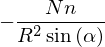

In [29]:
sym.diff(K, R)

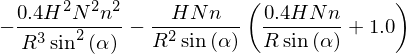

In [30]:
sym.diff(B, R)

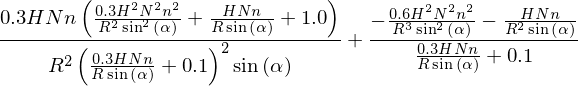

In [31]:
sym.diff(D, R)

In [33]:
sym.diff(g, phi)

In [36]:
sym.diff(g, phi, 2)

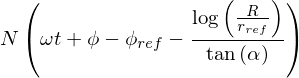

In [37]:
g

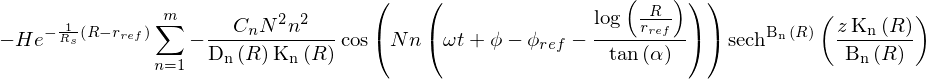

In [43]:
d2Phi_dphi2 = sym.diff(Phi, phi, 2)
d2Phi_dphi2

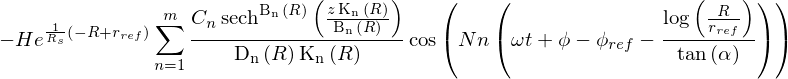

In [42]:
Phi

In [70]:
g = sym.var('g', cls=sym.Function)
g = g(R, phi, t)

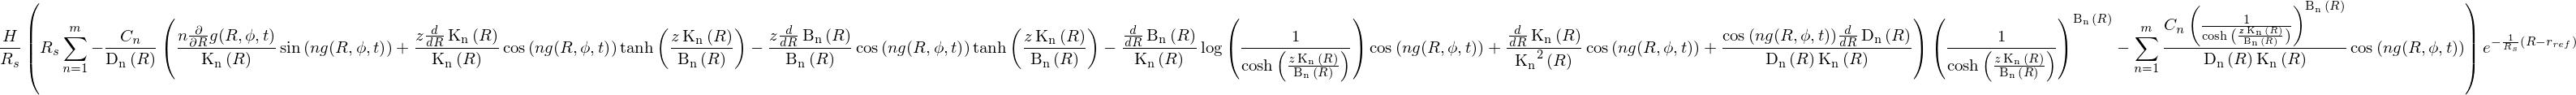

In [87]:
g, K_n, B_n, D_n = sym.symbols('g, K_n, B_n, D_n', cls=sym.Function)

# For now, just note the arguments of the following functions. They will be specified later.
g = g(R, phi, t)
K_n = K_n(R)
B_n = B_n(R)
D_n = D_n(R)

Phi = -H*sym.exp(-(R-r_ref)/R_s)*sym.summation((C_n/(K_n*D_n))*(sym.cos(n*g))*(sym.S(1) / sym.cosh(K_n*z/B_n))**B_n,
                                                (n, 1, m))
Rforce = sym.simplify(-sym.diff(Phi, R))
Rforce

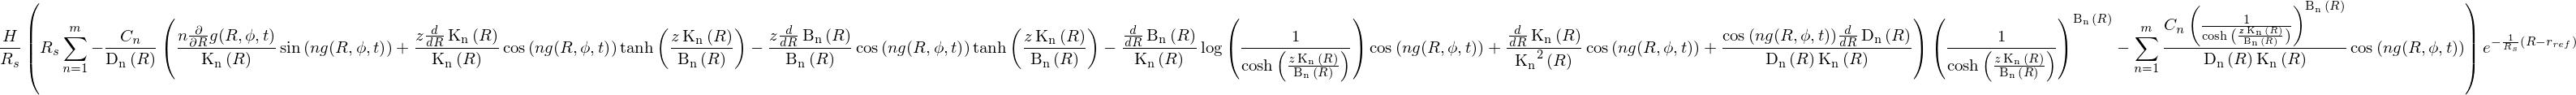

In [86]:
Rforce

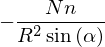

In [52]:
sym.diff(K, R)

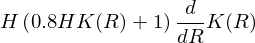

In [57]:
K = sym.var('K', cls=sym.Function)
K = K(R)
B = K*H * (1+ 0.4*K*H)
sym.simplify(sym.diff(B, R))

In [67]:
D = (sym.S(1)+K*H+sym.S(0.3)*(K*H)**sym.S(2))/(sym.S(1)+sym.S(0.3)*K*H)

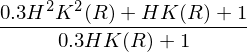

In [68]:
D

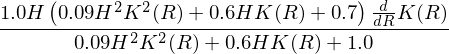

In [69]:
sym.simplify(sym.diff(D, R))